In [ ]:
!apt-get install -y python-qt4

In [19]:
!pip install blockcypher

    100% |################################| 460kB 2.5MB/s 
    100% |################################| 266kB 3.8MB/s 
  Running setup.py bdist_wheel for blockcypher ... - done
  Stored in directory: /root/.cache/pip/wheels/0f/07/ab/71c5afd06c7700a49b9f49e75363e3a2ab1daf3be0afb49eb9
  Running setup.py bdist_wheel for python-dateutil ... - done
  Stored in directory: /root/.cache/pip/wheels/1f/0e/b1/c2af9598a2c3d7bf50ba78eb60ac2032de17b885d7b79fdede
  Running setup.py bdist_wheel for bitcoin ... - done
  Stored in directory: /root/.cache/pip/wheels/7e/9d/7a/a80ad9e9766b6871daf0228520b68d09b9fe2ebb243d7cf267
Successfully built blockcypher python-dateutil bitcoin
  Found existing installation: requests 2.9.1
    Uninstalling requests-2.9.1:
      Successfully uninstalled requests-2.9.1
  Found existing installation: python-dateutil 2.5.0
    Uninstalling python-dateutil-2.5.0:
      Successfully uninstalled python-dateutil-2.5.0
  Found existing installation: bitcoin 1.1.42
    Unins

In [ ]:
!pip install bs4

In [2]:
import datalab.bigquery as bq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import num2date
from matplotlib.dates import date2num
from matplotlib.finance import candlestick_ohlc
import json
from pprint import pprint
from PyQt4 import QtGui, QtCore
import urllib
import requests
import sys
import gzip
import urllib
import datetime
import numpy as np
import pandas as pd
import time
import re

In [3]:
%%sql --module txn
select count(txid) as no_of_txn, txnTS from blockchain.userEdges
group by txnTS


In [4]:
df = bq.Query(txn).to_dataframe()

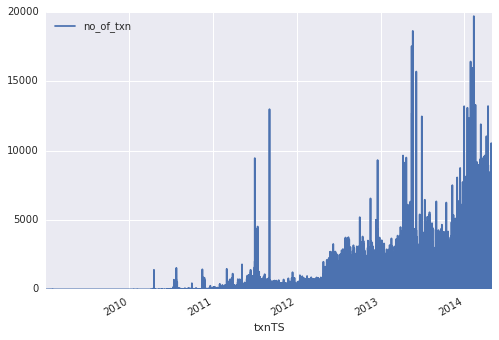

In [5]:
df.plot(x='txnTS',y='no_of_txn')

In [6]:
%%sql --module btc_sinks
SELECT a.outAddrId, b.address, sum(a.value) as btc_amount
FROM (
SELECT 
  outAddrId, value
FROM [plasma-centaur-859:blockchain.userEdges]
) a
JOIN EACH (
SELECT
  id, address
FROM
  [plasma-centaur-859:blockchain.address] 
) b
ON a.outAddrId = b.id
WHERE a.outAddrId = b.id
GROUP BY 1,2
ORDER BY 3 DESC
LIMIT 500


In [7]:
topSinks=bq.Query(btc_sinks).to_dataframe()

In [8]:
topSinks

,a_outAddrId,b_address,btc_amount
0,2536935,13hKjDXD5WFZreZzfAGFpgajEdMotuxRvk,2.546664e+07
1,2298461,17URSNmoNqAunWUa3fi6rx22s8BJkAEkPT,5.706508e+06
2,7996957,19Hx7xow6RKTcqney12KYFsZzKpRib8iG1,5.005462e+06
3,17322005,17zRM14vC2z4QtSnANdnthY9LYovnfV84Z,3.403557e+06
4,12557222,18T1hzjughXdG4ucUh8ACDmCYK3baJpCEf,1.771494e+06
5,11204757,17wWMcge7fWV9r6JCLRc4iVmPnW6yGhNUc,1.573960e+06
6,19314133,1NQvPqe2op85q9X9hgSY5GxJERmqoSBmCf,1.569076e+06
7,3524361,1LWBSqy4s7yZrKU6GfFzx7YmsHcXfuksUZ,1.016878e+06
8,6835733,16YgsR6EGWtx3N2X3c6DvTesrKab9qriu6,9.550461e+05
9,7033638,14486XytdA6yKh4cGUGzrmxccaSznXeAAD,9.228888e+05


In [9]:
#Get relay ip for transactions

In [10]:
import json
from blockcypher import get_address_overview
import time

In [11]:

def getAddressInfo(smallDf, token):
  for index, row in smallDf.iterrows():
    data = (get_address_overview(row['address'],'btc',token))
    final_n_tx = data['final_n_tx']
    n_tx = data['n_tx']
    unconfirmed_balance = data['unconfirmed_balance']
    final_balance = data['final_balance']
    balance = data['balance']
    total_sent = data['total_sent']
    address = data['address']
    total_received = data['total_received']
    print(address, total_received, balance, final_n_tx, total_sent)
    temp = {
      "address": address,
      "final_n_tx": final_n_tx,
      "n_tx": n_tx,
      "unconfirmed_balance": unconfirmed_balance,
      "final_balance": final_balance,
      "balance": balance,
      "total_sent": total_sent,
      "total_received": total_received,
    }
    addresses.append(temp)
    #introduce pause
    time.sleep (100.0 / 1000.0); 
    

In [12]:
addresses=[]
df_new1, df_new2, df_new3 = topSinks[:199], topSinks[200:399], topSinks[400:499]

In [13]:
#bypassing API call rate limit
getAddressInfo(df_new1,'62aa1f7dbc694b3e939fa8a2b9762f9f')

KeyError: 'address'

In [ ]:
#Get know identities

In [ ]:
from bs4 import BeautifulSoup

known_addresses = []

def lets_get_scraping(url, id):
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')

    for tr in soup.tbody.find_all('tr'):
        for strong_tag in tr.find_all('strong'):
            if id == 1:
                temp = {strong_tag.get_text(): 1}
                known_addresses.append(temp)
            elif id == 2:
                temp = {strong_tag.get_text(): 2}
                known_addresses.append(temp)
            elif id == 3:
                temp = {strong_tag.get_text(): 3}
                known_addresses.append(temp)
            elif id == 4:
                temp = {strong_tag.get_text(): 4}
                known_addresses.append(temp)
    return known_addresses


for i in range(17):
    gambling = 'http://bitcoinwhoswho.com/search/index/index/keyword/gambling/page/{0}'.format(i)
    lets_get_scraping(gambling, id=1)

print('Completed: Gambling')

for i in range(2):
    charity = 'http://bitcoinwhoswho.com/search/index/index/keyword/charity/page/{0}'.format(i)
    lets_get_scraping(charity, id=2)

for i in range(34):
    charity = 'http://bitcoinwhoswho.com/search/index/index/keyword/donate/page/{0}'.format(i)
    lets_get_scraping(charity, id=2)

print('Completed: Charity')

for i in range(17):
    finance = 'http://bitcoinwhoswho.com/search/index/index/keyword/finance/page/{0}'.format(i)
    lets_get_scraping(finance, id=3)

print('Completed: Finance')

for i in range(162):
    exchange = 'http://bitcoinwhoswho.com/search/index/index/keyword/exchange/page/{0}'.format(i)
    lets_get_scraping(exchange, id=3)

In [ ]:
%%sql --module address_with_most_senders
SELECT b.address as addr, count (DISTINCT sender) as sender_counts
FROM
(SELECT 
  sender, outAddrId
FROM [plasma-centaur-859:blockchain.userEdges]
) a
JOIN EACH (
SELECT
  id, address
FROM
  [plasma-centaur-859:blockchain.address] 
) b
ON a.outAddrId = b.id
WHERE a.outAddrId = b.id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 20000

In [ ]:
most_senderDf=bq.Query(address_with_most_senders).to_dataframe()

In [ ]:
Gambling = []
Charity = []
Finance = []
for index, row in most_senderDf.iterrows():
  for known in known_addresses:
       k = known.keys()[0]
       if k == row['addr']:
          if known[k] == 1:
              Gambling.append(row['addr'])
          if known[k] == 2:
              Charity.append(row['addr'])
          if known[k] == 3:
              Finance.append(row['addr'])

In [ ]:
print 'number of Gambling -> ' + str(len(Gambling)) 
print 'number of Charity -> ' + str(len(Charity)) 
print 'number of Finance -> ' + str(len(Finance)) 

In [ ]:
Gambling

In [ ]:
#Time series analyiss USD/BTC and USD/Gold

In [ ]:
def remove_bitcoin_date_duplicates(frame):
    """
    Remove bitcoin date duplicates by using (weighted) aggregation.
    """
    # Aggregate duplicate dates
    frame['price'] = frame['price'] * frame['amount']
    frame = frame.groupby(level=0).sum()
    frame['price'] = np.round(frame['price'] / frame['amount'], 5)
    return frame

In [ ]:
def convert_to_ohlc(frame, freq='1D'):
    """
    Compute bitcoin OHLC data frame with the given frequency.
    @param frame: raw bitcoin price history.
    @param freq: target OHLC frequency.
    """
    ohlc = frame['price'].resample(freq).ohlc()
    close = frame['price'].resample(freq).last().ffill()
    for column in ['open', 'high', 'low', 'close']:
        ohlc[column] = np.where(np.isnan(ohlc[column]), close, ohlc[column])
    ohlc['amount'] = frame['amount'].resample(freq).last()
    ohlc['amount'].fillna(0.0, inplace=True)
    return ohlc

In [ ]:
#load csv from google cloud storage btc prices
%storage read --object gs://testdata-bg-ml/blockchain/mtgoxUSD.csv --variable btcusd

In [ ]:
from StringIO import StringIO
btcdf=pd.read_csv(StringIO(btcusd), header=None)
btcdf.columns = ['dt', 'price', 'amount']
btcdf['dt'] = pd.to_datetime(btcdf['dt'], unit='s')

In [ ]:
btcdf.set_index(btcdf['dt'], inplace=True)
btcdf.sort_index()
btcdf=btcdf[['price', 'amount']]

In [ ]:
remove_bitcoin_date_duplicates(btcdf)
btc_ohlc=convert_to_ohlc(btcdf, freq='1D')
btc_ohlc[len(btc_ohlc)-20:len(btc_ohlc)-1]

In [ ]:
btc_ohlc['close'].plot()

In [ ]:
%%sql --module goldusd
SELECT DATE(date) AS dt, price as close
FROM blockchain.gold2usdDaily
WHERE DATE(date) >= DATE('2010-07-17') AND DATE(date) <= DATE('2014-02-25') 
ORDER BY dt

In [ ]:
golddf=bq.Query(goldusd).to_dataframe().set_index('dt')

In [ ]:
golddf.plot()

In [ ]:
data = golddf.join(btc_ohlc['close'],how='left', lsuffix='_gold', rsuffix='_btc')
data['gold_scaled'] = data['close_gold']/max(data['close_gold'])
data['btc_scaled'] = data['close_btc']/max(data['close_btc'])

In [ ]:
data_scaled=pd.concat([data['gold_scaled'],data['btc_scaled']],axis=1)
data_scaled.plot(figsize=(20,15))

In [ ]:
log_return = pd.DataFrame()
log_return['gold_return'] = np.log(data['close_gold']/data['close_gold'].shift())
log_return['btc_return'] = np.log(data['close_btc']/data['close_btc'].shift())

In [ ]:
log_return.describe()

In [ ]:
_ = pd.concat([log_return['gold_return'], log_return['btc_return']], axis=1).plot(figsize=(20,15), color='darkgreen')

In [ ]:
from pandas.tools.plotting import scatter_matrix
_ = scatter_matrix (log_return, figsize=(5,5), diagonal='kde')

In [ ]:
log_return.corr()

In [ ]:
def getTxnRelayIP(hash):
  api_url = "https://blockchain.info/rawtx/" + hash
  res = requests.get(api_url)
  resJson=json.loads(res.text)
  print resJson
  return resJson['relayed_by']


In [ ]:
%%sql --module top_value_txns
SELECT txnKey
FROM [plasma-centaur-859:blockchain.top_100_value_txns]

In [ ]:
txn_pd=bq.Query(top_value_txns).to_dataframe()

In [ ]:
from geoip import geolite2
where = []
for index, row in txn_pd.iterrows():
  ip = getTxnRelayIP(row['txnKey'])
  match = geolite2.lookup(ip)
  if match != None:
    dict['lat'] = match.location[0]
    dict['lon'] = match.location[1]
    where.append(dict)


In [ ]:
getTxnRelayIP('3b7c45eec9810eacb57effef5c2171dc0a6cf35de5d3c19d7d483252b21f97a9')

In [ ]:
%%sql --module taxi

DEFINE QUERY locations
  SELECT FLOAT(pickup_latitude) AS lat, FLOAT(pickup_longitude) AS lon, medallion
  FROM [833682135931:nyctaxi.trip_data]

DEFINE QUERY geohashes
  SELECT lat, lon,
         CONCAT(STRING(FLOOR(lat*1000+0.5)/1000), ':', STRING(FLOOR(lon*1000+0.5)/1000)) AS geoid,
         medallion
  FROM $locations
  WHERE lat != 0 AND lon != 0

DEFINE QUERY hotspots
  SELECT FIRST(lat) AS lat, FIRST(lon) AS lon, COUNT(medallion) AS pickups
  FROM $geohashes
  WHERE ABS(HASH(medallion)) % 1000 == 1
  GROUP BY geoid
  ORDER BY pickups DESC
  LIMIT 25

In [ ]:
%%chart map --fields lat,lon,pickups --data taxi.hotspots
showTip: true
mapType: normal